<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

# Google Colaboratory!


Colaboratory is a free [Jupyter Notebook](https://jupyter.org/) environment that requires no setup and runs entirely in the cloud.

With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

## Virtual Machine
The most powerful feature of google colab is the ability to use cloud GPU for free. Like the other desktop environment you can also access most of the bash command with a `!` added in the front of the command.

At first turn on the GPU from `Runtime`->`Change Runtime Type`->`Hardware Acceleration`

The entire colab runs in a cloud VM. Let's investigate the VM. You will see that the current colab notebook is running on top of `Ubuntu 22.04.4 LTS`.

In [1]:
!cat /etc/*release

DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=22.04
DISTRIB_CODENAME=jammy
DISTRIB_DESCRIPTION="Ubuntu 22.04.4 LTS"
PRETTY_NAME="Ubuntu 22.04.4 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.4 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


In [2]:
!ls -l
!pwd

total 4
drwxr-xr-x 1 root root 4096 Nov 12 14:30 sample_data
/content


In [3]:
from platform import python_version
print("Python version", python_version())

Python version 3.12.12


In [5]:
%%bash
#Unix hosts only
ls

sample_data


# Cells
A notebook is a list of cells. Cells contain either explanatory text or executable code and its output. Click a cell to select it.

## Code cells
Next is a **code cell**. Once the toolbar button indicates CONNECTED, click in the cell to select it and execute the contents

In [7]:
x =100
x

100

In [ ]:
# @title AI prompt cell

import ipywidgets as widgets
from IPython.display import display, HTML, Markdown,clear_output
from google.colab import ai

dropdown = widgets.Dropdown(
    options=[],
    layout={'width': 'auto'}
)

def update_model_list(new_options):
    dropdown.options = new_options
update_model_list(ai.list_models())

text_input = widgets.Textarea(
    placeholder='Ask me anything....',
    layout={'width': 'auto', 'height': '100px'},
)

button = widgets.Button(
    description='Submit Text',
    disabled=False,
    tooltip='Click to submit the text',
    icon='check'
)

output_area = widgets.Output(
     layout={'width': 'auto', 'max_height': '300px','overflow_y': 'scroll'}
)

def on_button_clicked(b):
    with output_area:
        output_area.clear_output(wait=False)
        accumulated_content = ""
        for new_chunk in ai.generate_text(prompt=text_input.value, model_name=dropdown.value, stream=True):
            if new_chunk is None:
                continue
            accumulated_content += new_chunk
            clear_output(wait=True)
            display(Markdown(accumulated_content))

button.on_click(on_button_clicked)
vbox = widgets.GridBox([dropdown, text_input, button, output_area])

display(HTML("""
<style>
.widget-dropdown select {
    font-size: 18px;
    font-family: "Arial", sans-serif;
}
.widget-textarea textarea {
    font-size: 18px;
    font-family: "Arial", sans-serif;
}
</style>
"""))
display(vbox)


GridBox(children=(Dropdown(layout=Layout(width='auto'), options=('google/gemini-2.5-flash', 'google/gemini-2.5…

## Text cells
This is a **text cell**. You can **double-click** to edit this cell. Text cells
use markdown syntax. To learn more, see our [markdown
guide](/notebooks/markdown_guide.ipynb).

You can also add math to text cells using [LaTeX](http://www.latex-project.org/)
to be rendered by [MathJax](https://www.mathjax.org). Just place the statement
within a pair of **\$** signs. For example `$\sqrt{3x-1}+(1+x)^2$` becomes
$\sqrt{3x-1}+(1+x)^2.$

## Hierarchical Organization

Markdown supports six levels of headers to organize your document. Headers are text preceded by one to six hash symbols. The more hash symbols, the lower the level.

The outline pane on the left side shows the document outline and permits quick navigation.


## Adding and moving cells
You can add new cells by using the + CODE and + TEXT buttons that show when you hover between cells. These buttons are also in the toolbar above the notebook where they can be used to add a cell below the currently selected cell.

You can move a cell by selecting it and clicking Cell Up or Cell Down in the top toolbar.

# Working with python
Long running python processes can be interrupted. Run the next cell and select Runtime -> Interrupt execution (hotkey: Cmd/Ctrl-M I) to stop execution.

In [8]:
import time
print("Sleeping")
time.sleep(30) # sleep for a while; interrupt me!
print("Done Sleeping")

Sleeping


KeyboardInterrupt: 

## Automatic completions and exploring code

Colab provides automatic completions to explore attributes of Python objects, as well as to quickly view documentation strings. As an example, first run the next cell to import the  [`numpy`](http://www.numpy.org) module.

In [9]:
import numpy as np

If you now insert your cursor after `np` and press **Period**(`.`), you will see the list of available completions within the `np` module.

In [ ]:
np.

<module 'numpy' from '/usr/local/lib/python3.12/dist-packages/numpy/__init__.py'>

If you type an open parenthesis after any function or class in the module, you will see a pop-up of its documentation string:

In [ ]:
np.ndarray()

numpy.ndarray

*The* documentation can be opened again using **Ctrl+Shift+Space**

In [ ]:
np.ndarray

## Exception Formatting
Exceptions are formatted nicely in Colab outputs:

In [ ]:
x = 1
y = 4
z = y/(1-x)

ZeroDivisionError: division by zero

## Rich, interactive outputs
Until now all of the generated outputs have been text, but they can be more interesting, like the chart below.

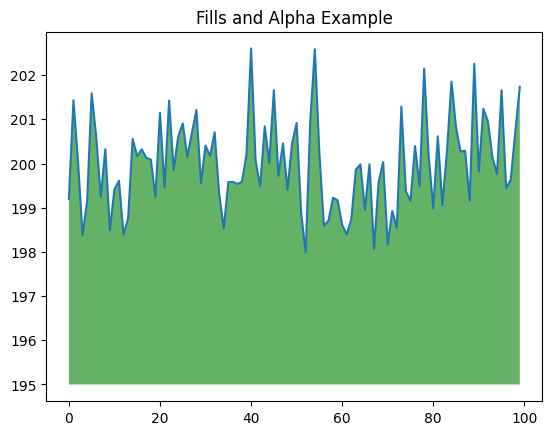

In [10]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Fills and Alpha Example")
plt.show()

# Integration with Drive

Colaboratory is integrated with Google Drive. It allows you to share, comment, and collaborate on the same document with multiple people:

* The **SHARE** button (top-right of the toolbar) allows you to share the notebook and control permissions set on it.

* **File->Make a Copy** creates a copy of the notebook in Drive.

* **File->Save** saves the File to Drive.

* **File->Revision history** shows the notebook's revision history.

## Commenting on a cell
You can comment on a Colaboratory notebook like you would on a Google Document. Comments are attached to cells, and are displayed next to the cell they refer to. If you have **comment-only** permissions, you will see a comment button on the top right of the cell when you hover over it.

If you have edit or comment permissions you can comment on a cell in one of three ways:

1. Select a cell and click the comment button in the toolbar above the top-right corner of the cell.
1. Right click a text cell and select **Add a comment** from the context menu.
3. Use the shortcut **Ctrl+Shift+M** to add a comment to the currently selected cell.

You can resolve and reply to comments, and you can target comments to specific collaborators by typing *+[email address]* (e.g., `+user@domain.com`). Addressed collaborators will be emailed.

The Comment button in the top-right corner of the page shows all comments attached to the notebook.

# External Data

You can access data in a number of ways, including: Mounting your Google Drive in the runtime's virtual machine

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
!git clone https://github.com/AI4DM/Disaster-Risk-Monitoring-Using-Satellite-Imagery.git

Cloning into 'Disaster-Risk-Monitoring-Using-Satellite-Imagery'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 63 (delta 0), reused 63 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (63/63), 33.76 MiB | 36.74 MiB/s, done.


In [13]:
!ls -l

total 12
drwxr-xr-x 4 root root 4096 Nov 17 16:36 Disaster-Risk-Monitoring-Using-Satellite-Imagery
drwx------ 6 root root 4096 Nov 17 16:36 drive
drwxr-xr-x 1 root root 4096 Nov 12 14:30 sample_data


# Edit Multiple Cursors

Sometimes, you need to edit several places at once. Press command (macOS) or Alt (Windows) and click to place additional cursors.

In [ ]:
# Change the 4 "dd"s to "gg"
+ ddasasa.theme_bw()
+ ddasasa.theme(figure_size=(10,6))
+ ddasasa.theme(axis_text_x=ddasasa.element_text(angle=30, hjust=1))

NameError: name 'dd' is not defined

---

# TQDM

A popular progress bar tool integrated with many data science packages.

In [14]:
from tqdm.notebook import tqdm

In [16]:
import time

for i in tqdm(range(20)):
    time.sleep(.5)

  0%|          | 0/20 [00:00<?, ?it/s]

# Time and Timeit cell magics

In [ ]:
%%time
for i in tqdm(range(20)):
    time.sleep(.5)

  0%|          | 0/20 [00:00<?, ?it/s]

CPU times: user 46.2 ms, sys: 4.4 ms, total: 50.6 ms
Wall time: 10 s


In [17]:
%%timeit
sum(x**2 for x in range(1,100000,10))

1.15 ms ± 417 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Jupyter Widgets

Widgets are a collection of simple interactive elements that can be used to create a GUI in Jupyter.

Uses:

- enhance teaching and communication
- support specialized interactive data analysis
- create simple interfaces for human coding tasks like tagging, sorting, ranking or classifying.  


https://ipywidgets.readthedocs.io/en/stable/

In [18]:
%pip install -q ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.6 MB/s eta 0:00:00


In [19]:
from ipywidgets import interact

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

In [21]:
import networkx as nx

In [22]:
# wrap a few graph generation functions so they have the same signature

def random_lobster(n, m, k, p):
    return nx.random_lobster(n, p, p / m)

def powerlaw_cluster(n, m, k, p):
    return nx.powerlaw_cluster_graph(n, m, p)

def erdos_renyi(n, m, k, p):
    return nx.erdos_renyi_graph(n, p)

def newman_watts_strogatz(n, m, k, p):
    return nx.newman_watts_strogatz_graph(n, k, p)

def plot_random_graph(n, m, k, p, generator):
    g = generator(n, m, k, p)
    nx.draw(g)
    plt.show()

In [23]:
interact(plot_random_graph, n=(2,30), m=(1,10), k=(1,10), p=(0.0, 0.99, 0.001),
         generator=[
             ('lobster', random_lobster),
             ('power law', powerlaw_cluster),
             ('Newman-Watts-Strogatz', newman_watts_strogatz),
             (u'Erdős-Rényi', erdos_renyi),
         ]);

interactive(children=(IntSlider(value=16, description='n', max=30, min=2), IntSlider(value=5, description='m',…

Code is executed in a virtual machine private to your account. Virtual machines are deleted when idle for a while, and have a maximum lifetime enforced by the Colab service.

Google Drive operations can time out when the number of files or subfolders in a folder grows too large. Avoid storing thousands of items in the top-level "My Drive" folder: storing more than approximately ten thousand items in the root directory can cause mounting to fail.
If you encounter this problem, try moving files and folders directly contained in "My Drive" into sub-folders, though each folder should not contain more than ten thousand items.

Colab prioritizes interactive compute. Runtimes will time out if you are idle.

In the version of Colab that is free of charge notebooks can run for at most 12 hours, depending on availability and your usage patterns.

# The New AI-First Colab
- Iterative Querying: A simple conversational interface for generating code,
explaining concepts, and fixing errors.
- Next-Generation Data Science Agent (DSA): An agent that can autonomously analyze data, generate a plan, execute code, and present findings.
- Code Transformation: The ability to modify existing code across your notebook using natural language descriptions.

- Generate and transform Code: Ask for short functions, boilerplate, or even refactor code across multiple cells.
- Chat about python libraries: Discover new tools and ask for sample usage grounded in the context of your work.
- Fix errors intelligently: When errors arise, Colab will iteratively suggest fixes in a diff view for your review.
- Execute autonomous agentic flows: Trigger complete analytical workflows with the Data Science Agent. Simply provide a high-level goal, and the agent will generate a plan, execute the necessary code, and present its findings.
- Analyze your data: Upload files (like CSVs, JSON, or Excel) or point to data in your runtime and ask the AI to perform in-depth analysis, create visualizations, and uncover insights.

In [ ]:
# Available AI features

# Colab Pro for Education subscription
Visit the [Colab signup page](https://colab.research.google.com/signup?utm_source=faq&utm_medium=link&utm_campaign=reverify_for_edu_pro) and clicking “No cost for students and educators”. If that button is not present, then that also means that the offer is no longer available.